In [143]:
import pandas as pd
import math
import numpy as n
import matplotlib.pyplot as plt

df_normalized = pd.read_csv('../data/Ca_fire_weather.csv')
df = pd.read_csv('../data/Ca_fire_weather_not_normalized.csv')
df

,Unnamed: 0,AcresBurned,ArchiveYear,Precip (in),Days Burned,Precipitation,Temperature,Humidity,Wind Speed,CalFireIncident 0,...,CIMIS Region 2,CIMIS Region 3,CIMIS Region 4,CIMIS Region 5,CIMIS Region 6,CIMIS Region 7,CIMIS Region 8,CIMIS Region 9,CIMIS Region 10,CIMIS Region 11
0,0,410203.0,2018,0.00,162,0.019444,60.873457,64.654321,4.472840,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,48920.0,2018,0.00,162,0.019444,60.873457,64.654321,4.472840,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,75.0,2018,0.00,185,0.017213,62.727869,64.683060,4.425137,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,972.0,2018,0.00,158,0.000000,0.000000,0.000000,0.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,90.0,2018,0.00,184,0.024000,73.165000,49.650000,3.790000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,444,13.0,2019,0.00,2,0.005000,80.500000,32.500000,5.250000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
445,445,11.0,2019,0.00,1,0.000000,72.900000,63.000000,2.500000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
446,446,11.0,2019,0.00,1,0.000000,65.900000,77.000000,3.300000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
447,447,10.0,2019,0.00,1,0.000000,76.000000,37.000000,3.100000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [144]:
for col in df.columns:
    print(col)

Unnamed: 0
AcresBurned
ArchiveYear
Precip (in)
Days Burned
Precipitation
Temperature
Humidity
Wind Speed
CalFireIncident 0
CalFireIncident 1
County 0
County 1
County 2
County 3
County 4
County 5
County 6
County 7
County 8
County 9
County 10
County 11
County 12
County 13
County 14
County 15
County 16
County 17
County 18
County 19
County 20
County 21
County 22
County 23
County 24
County 25
County 26
County 27
County 28
County 29
County 30
County 31
County 32
County 33
County 34
County 35
County 36
County 37
County 38
County 39
County 40
County 41
Stn Id 0
Stn Id 1
Stn Id 2
Stn Id 3
Stn Id 4
Stn Id 5
Stn Id 6
Stn Id 7
Stn Id 8
Stn Id 9
Stn Id 10
Stn Id 11
Stn Id 12
Stn Id 13
Stn Id 14
Stn Id 15
Stn Id 16
Stn Id 17
Stn Id 18
Stn Id 19
Stn Id 20
Stn Id 21
Stn Id 22
Stn Id 23
Stn Id 24
Stn Id 25
Stn Id 26
Stn Id 27
Stn Id 28
Stn Id 29
Stn Id 30
Stn Id 31
Stn Id 32
Stn Id 33
Stn Id 34
Stn Id 35
Stn Id 36
Stn Id 37
Stn Id 38
Stn Id 39
Stn Id 40
Stn Id 41
Stn Id 42
Stn Id 43
CIMIS Region 0
CIMI

## List of colors in python:  
## https://matplotlib.org/3.1.0/gallery/color/named_colors.html

In [145]:
# https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr
# https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram
def histexploration(feature, df, X_label, Y_label, title, column_color, num_bins):
    min_val = df[feature].min()
    max_val = df[feature].max()
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    n_term = len(df[feature])**(0.33)
    binwidth = 2 * IQR / n_term
    if binwidth == 0:
        binwidth = 0.1
    n_bins = (max_val - min_val) / binwidth
    n_bins = math.ceil(n_bins)
    if (num_bins != 0):
        n_bins = num_bins
    axes = df[feature].hist(bins=n_bins, color=column_color, ec='black', linewidth=1.5)
    axes.grid(False)
    axes.set_xlabel(X_label)
    axes.set_ylabel(Y_label)
    axes.title.set_text(title)

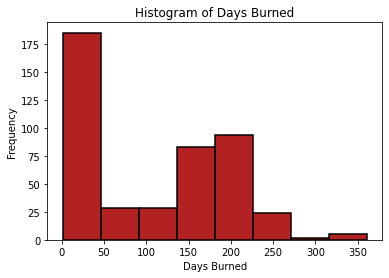

In [146]:
histexploration('Days Burned', df, 'Days Burned', 'Frequency', 'Histogram of Days Burned', 'firebrick', 0)

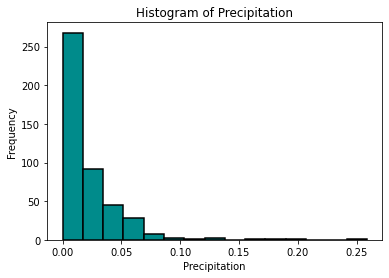

In [150]:
histexploration('Precipitation', df, 'Precipitation', 'Frequency', 'Histogram of Precipitation', 'darkcyan', 15)

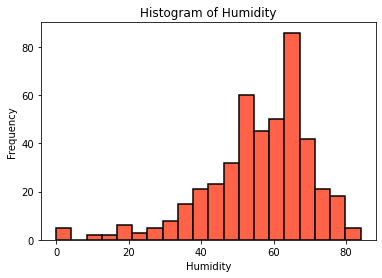

In [148]:
histexploration('Humidity', df, 'Humidity', 'Frequency', 'Histogram of Humidity', 'tomato', 0)

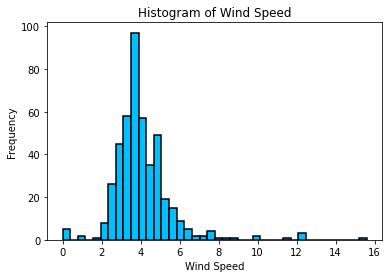

In [149]:
histexploration('Wind Speed', df, 'Wind Speed', 'Frequency', 'Histogram of Wind Speed', 'deepskyblue', 0)